# Traveling Salesman - Simulated Annealing

In [1]:
import os
import math
import random as rd
import matplotlib.pyplot as pl
from timeit import default_timer as timer

pl.style.use('ggplot')

if not os.path.exists('dump'):
    os.makedirs('dump')

## Full mutations
+ Too naive to work on difficult problems


N=50	nruns=1000000

trial=     0	energy=29.910690526201712
trial=     1	energy=24.075589025335944
trial=    14	energy=22.960705233804962
trial=    25	energy=22.812730710020922
trial=   295	energy=22.739872507816507
trial=   322	energy=22.56656895533219
trial=   778	energy=22.109910402696748
trial=   847	energy=22.050813087331456
trial=  1244	energy=21.27268952917775
trial=  2879	energy=20.721306907279338
trial= 10489	energy=19.654232183733292
trial= 13507	energy=19.510996978570233
trial=185807	energy=19.344374889663616
trial=425018	energy=18.865453727076257

run time = 48.81 s


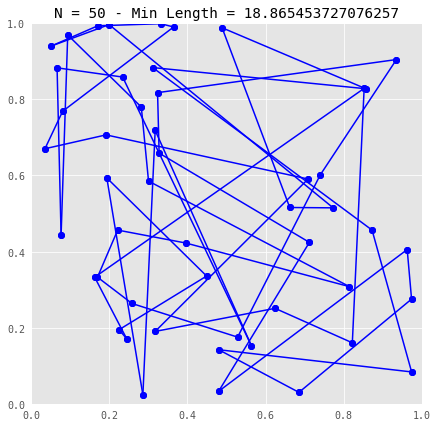

In [4]:
def dist(x, y):
    dx = x[0] - y[0]
    dy = x[1] - y[1]
    return math.sqrt(dx**2 + dy**2)

def tour_length(cities, N):
    distances = [dist(cities[k], cities[k + 1]) for k in range(N - 1)] + [dist(cities[0], cities[N - 1])]
    return sum(distances)

t0 = timer()

N = 50
nruns = int(1e6)
print('\nN={}\tnruns={}\n'.format(N, nruns))

rd.seed(54321)
cities = [(rd.uniform(0.0, 1.0), rd.uniform(0.0, 1.0)) for i in range(N)]

for r in range(1):

    rd.seed()
    energy_min = float('inf')

    for t in range(nruns):
        rd.shuffle(cities)
        energy =  tour_length(cities, N)
        if energy < energy_min:
            print('trial={: >6d}\tenergy={}'.format(t, energy))
            energy_min = energy
            new_cities = cities[:]
    cities = new_cities[:]

    print('\nrun time = {:.2f} s'.format(timer()-t0))
    
    pl.figure(figsize=(7, 7))
    for i in range(N-1):
        pl.plot([cities[i][0], cities[i+1][0]], [cities[i][1], cities[i+1][1]], 'bo-')
    pl.plot([cities[0][0], cities[N-1][0]], [cities[0][1], cities[N-1][1]], 'bo-')
    pl.title('N = '+str(N)+' - Min Length = '+str(energy_min))
    pl.axis([0.0, 1.0, 0.0, 1.0])
#     pl.axis('scaled')

    fig_name = 'traveling_salesman_solution_{}_energy_{}_r_{}'.format(N, energy_min, r)
    path = os.path.join('dump', fig_name+'.png')
    pl.savefig(path)
    
    pl.show()
    

## Incremental mutations
+ A lot more efficient


N=50	nruns=1000000

step=     0	best energy=inf	temperature=1.0
step=100000	best energy=9.598086704727983	temperature=0.13806178455084148
step=200000	best energy=7.088597702526526	temperature=0.0758832760158133
step=300000	best energy=6.684965655932945	temperature=0.05432752673585292
step=400000	best energy=6.014936375111391	temperature=0.042336684707819275
step=500000	best energy=6.014936375111391	temperature=0.034679623676514025
step=600000	best energy=5.95451550547534	temperature=0.029124750567859025
step=700000	best energy=5.933668839803041	temperature=0.025077276122842815
step=800000	best energy=5.93366883980304	temperature=0.021917786618022867
step=900000	best energy=5.925728267222882	temperature=0.01944514618132457
step=999999	best energy=5.925728267222882	temperature=0.017251455021565026

run time = 25.73 s


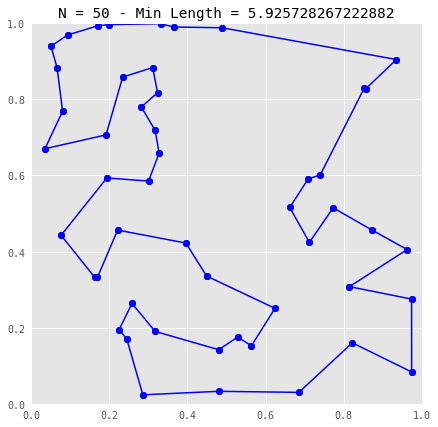

step=     0	best energy=25.87745852537872	temperature=1.0
step=100000	best energy=9.86089322194615	temperature=0.13806178455084148
step=200000	best energy=7.437611704058231	temperature=0.07702722588716117
step=300000	best energy=6.359869519979933	temperature=0.05487216019137984
step=400000	best energy=6.0943512449153445	temperature=0.042761109972015154
step=500000	best energy=6.0184871220390646	temperature=0.0348530217948966
step=600000	best energy=5.914672841693535	temperature=0.029416726192301807
step=700000	best energy=5.902954635184556	temperature=0.025455319195054175
step=800000	best energy=5.894115604459194	temperature=0.02213751242886854
step=900000	best energy=5.894115604459194	temperature=0.01954237191223119
step=999999	best energy=5.887650445053429	temperature=0.017424400858156212

run time = 51.20 s


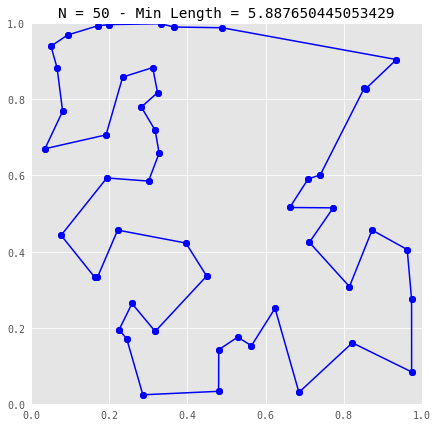

In [3]:
def dist(x, y):
    dx = x[0] - y[0]
    dy = x[1] - y[1]
    return math.sqrt(dx**2 + dy**2)

def tour_length(cities, N):
    distances = [dist(cities[k], cities[k + 1]) for k in range(N - 1)] + [dist(cities[0], cities[N - 1])]
    return sum(distances)

t0 = timer()

N = 50
nruns = int(1e6)
print('\nN={}\tnruns={}\n'.format(N, nruns))
rd.seed(54321)
init_cities = [(rd.uniform(0.0, 1.0), rd.uniform(0.0, 1.0)) for i in range(N)]


for r in range(2):

    cities = init_cities[:]
    rd.seed()

    beta = 1.0
    n_accept = 0
    best_energy = float('inf')
    energy =  tour_length(cities, N)

    for step in range(nruns):
        if n_accept == 100:
            beta *=  1.005
            n_accept = 0
        p = rd.uniform(0.0, 1.0)
        if p  < 0.2:
            # reverse section i-j
            i = rd.randint(1, N-2)
            j = rd.randint(i+1, N-1)
            a = cities[i:j+1]
            a.reverse()
            new_cities =  cities[:i] + a + cities[j+1:]
        elif p < 0.6:
            # move i to j
            new_cities = cities[:]
            i = rd.randint(1, N - 1)
            a = new_cities.pop(i)
            j = rd.randint(1, N - 2)
            new_cities.insert(j, a)
        else:
            # swap i and j
            new_cities = cities[:]
            i = rd.randint(1, N - 1)
            j = rd.randint(1, N - 1)
            new_cities[i] = cities[j]
            new_cities[j] = cities[i]
        new_energy =  tour_length(new_cities, N)
        if rd.uniform(0.0, 1.0) < math.exp(- beta * (new_energy - energy)):
            n_accept += 1
            energy = new_energy
            cities = new_cities[:]
            if energy < best_energy:
                best_energy = energy
                best_tour = cities[:]
        if step % 100000 == 0:
            print('step={: >6d}\tbest energy={}\ttemperature={}'.format(step, best_energy, 1.0/beta))

    print('step={: >6d}\tbest energy={}\ttemperature={}'.format(step, best_energy, 1.0/beta))
    cities = best_tour[:]

    print('\nrun time = {:.2f} s'.format(timer()-t0))
    
    pl.figure(figsize=(7, 7))
    for i in range(N-1):
        pl.plot([cities[i][0], cities[i+1][0]], [cities[i][1], cities[i+1][1]], 'bo-')
    pl.plot([cities[0][0], cities[N-1][0]], [cities[0][1], cities[N-1][1]], 'bo-')
    pl.title('N = '+str(N)+' - Min Length = '+str(best_energy))
    pl.axis([0.0, 1.0, 0.0, 1.0])
#     pl.axis('scaled')

    fig_name = 'traveling_salesman_solution_{}_energy_{}_r_{}'.format(N, best_energy, r)
    path = os.path.join('dump', fig_name+'.png')
    pl.savefig(path)
    
    pl.show()
    

## Test zone

In [65]:
N = 11
# init_cities = [(rd.uniform(0.0, 1.0), rd.uniform(0.0, 1.0)) for i in range(N)]
init_cities = [e for e in range(N)]
print(init_cities)
cities = init_cities[:]

print('####### 1')
cities = init_cities[:]
print(N//2)
i = rd.randint(0, N-1)
print(i)
cities = cities[i:] + cities[:i]
print(cities)
i = rd.randint(0, N-1)
print(i)
a = cities[:i]
print(a)
a.reverse()
print(a)
new_cities =  a + cities[i:]
print(new_cities)

print('####### 1b')
cities = init_cities[:]
i = rd.randint(1, N-2)
print(i)
j = rd.randint(i+1, N-1)
print(j)
a = cities[i:j+1]
a.reverse()
new_cities =  cities[:i] + a + cities[j+1:]
print(new_cities)

print('####### 2')
cities = init_cities[:]
new_cities = cities[:]
print(new_cities)
i = rd.randint(1, N - 1)
print(i)
a = new_cities.pop(i)
print(a)
j = rd.randint(1, N - 2)
print(j)
new_cities.insert(j, a)
print(new_cities)

print('####### 3')
cities = init_cities[:]
new_cities = cities[:]
i = rd.randint(1, N - 1)
print(i)
j = rd.randint(1, N - 1)
print(j)
new_cities[i] = cities[j]
new_cities[j] = cities[i]
print(new_cities)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
####### 1
5
0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 10]
####### 1b
5
8
[0, 1, 2, 3, 4, 8, 7, 6, 5, 9, 10]
####### 2
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10
10
4
[0, 1, 2, 3, 10, 4, 5, 6, 7, 8, 9]
####### 3
1
1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
